In [1]:
from utils import *
from darknet import Darknet
import cv2

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
root_path = "./drive/My Drive/Colab Data/E0 270 - ML/Object Detection/YOLOv3/"

In [2]:
cfg_file = './cfg/yolov3.cfg'
weights_file = './weights/yolov3.weights'
classnames_file = './data/coco.names'
model = Darknet(cfg_file)
model.load_weights(weights_file)
class_names = load_class_names(classnames_file)
model.print_network()


    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   17 conv    256  3

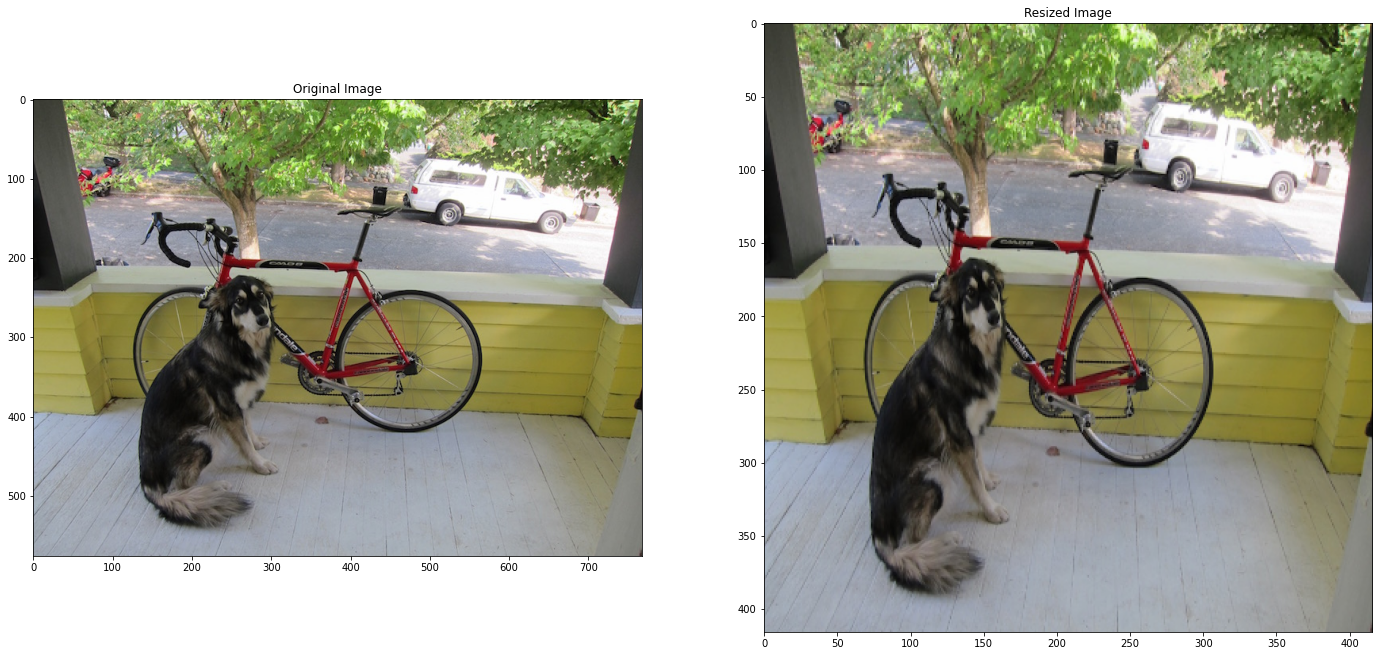

In [3]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]
img = cv2.imread('./images/dog.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
nms_thresh = 0.6  
iou_thresh = 0.4

plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()



It took 1.857 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. dog: 0.999997
2. truck: 0.992364
3. bicycle: 0.999998


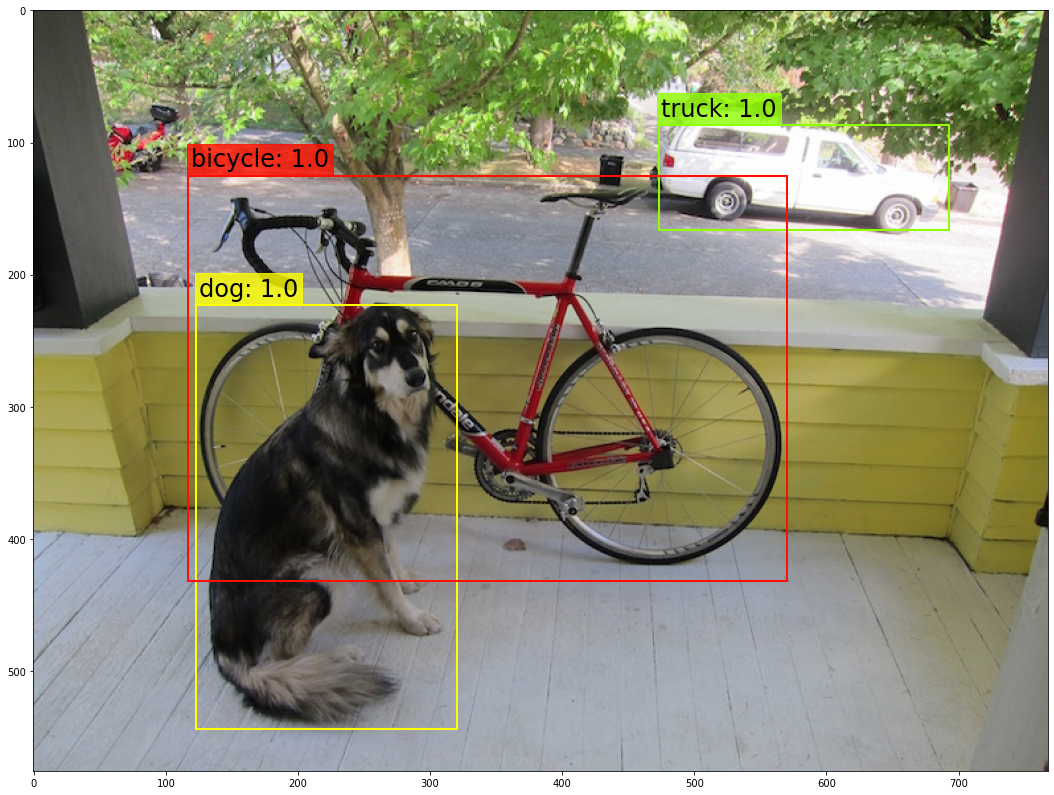

In [4]:
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)